<a href="https://colab.research.google.com/github/planetgitn/-Hotel-Booking-EDA/blob/main/2Hotel_Booking_Analysis_Capstone_Project_ANAND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# **Introduction**

Have you ever wondered the trends for hotel bookings? How long people stay? How often people cancel? What the busiest months are? In this analysis we explore a large dataset to examine these questions.

# **Methodology*

**In this project, We used Python's most useful libraries like Pandas, Matplotlib, Seaborn etc. to examine, cleaning and to analyse the “Hotel_Bookings” dataset.**

In [ ]:
# Importing some necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Reading csv file
df=pd.read_csv('/content/Hotel Bookings.csv')

In [ ]:
# Checking first 10 rows in dataset
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2.0,0.0,0.0,BB,PRT,Direct,Direct,0.0,0.0,0.0,C,C,3.0,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2.0,0.0,0.0,BB,PRT,Direct,Direct,0.0,0.0,0.0,C,C,4.0,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1.0,0.0,0.0,BB,GBR,Direct,Direct,0.0,0.0,0.0,A,C,0.0,No Deposit,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1.0,0.0,0.0,BB,GBR,Corporate,Corporate,0.0,0.0,0.0,A,A,0.0,No Deposit,304.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2.0,0.0,0.0,BB,GBR,Online TA,TA/TO,0.0,0.0,0.0,A,A,0.0,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03


In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14679,Resort Hotel,0,0,2017,April,16,18,0,1,1.0,0.0,0.0,BB,PRT,Corporate,Corporate,0.0,0.0,3.0,A,D,0.0,No Deposit,NaN,329.0,0.0,Transient,74.00,0.0,1.0,Check-Out,2017-04-19
14680,Resort Hotel,1,399,2015,December,52,22,0,1,2.0,0.0,0.0,BB,PRT,Online TA,TA/TO,0.0,1.0,0.0,A,A,0.0,No Deposit,240.0,NaN,0.0,Transient,36.00,0.0,0.0,Canceled,2015-01-01
14681,Resort Hotel,1,202,2015,July,30,22,2,5,2.0,0.0,0.0,BB,PRT,Offline TA/TO,TA/TO,1.0,1.0,0.0,A,A,0.0,No Deposit,156.0,NaN,0.0,Contract,90.95,0.0,0.0,Canceled,2015-01-01
14682,Resort Hotel,1,259,2015,September,38,17,0,3,2.0,0.0,0.0,BB,GBR,Groups,Corporate,0.0,1.0,0.0,A,A,0.0,Non Refund,NaN,223.0,0.0,Transient,40.05,0.0,0.0,Canceled,2015-01-21
14683,Resort Hotel,1,259,2015,September,38,17,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Dataset**


**This dataset contains information on records for client stays at hotels. More specifically, it contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. For the purpose of this post, We only focused on some of these variables to examine**.

In [ ]:
# Checking basic information of our dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14684 entries, 0 to 14683
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           14684 non-null  object 
 1   is_canceled                     14684 non-null  int64  
 2   lead_time                       14684 non-null  int64  
 3   arrival_date_year               14684 non-null  int64  
 4   arrival_date_month              14684 non-null  object 
 5   arrival_date_week_number        14684 non-null  int64  
 6   arrival_date_day_of_month       14684 non-null  int64  
 7   stays_in_weekend_nights         14684 non-null  int64  
 8   stays_in_week_nights            14684 non-null  int64  
 9   adults                          14683 non-null  float64
 10  children                        14683 non-null  float64
 11  babies                          14683 non-null  float64
 12  meal                            

In [ ]:
# Exploring descriptive statistical parameter

df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,14684.000000,14684.000000,14684.000000,14684.000000,14684.000000,14684.000000,14684.000000,14683.000000,14683.000000,14683.000000,14683.000000,14683.000000,14683.000000,14683.000000,12172.000000,1005.000000,14683.000000,14683.000000,14683.000000,14683.000000
mean,0.692863,117.094593,2016.023154,28.428766,15.852969,1.292291,3.409153,1.913574,0.162773,0.011169,0.000136,0.008922,0.131717,0.225703,222.486773,219.241791,1.017367,101.136610,0.054485,0.537833
std,0.461322,100.774470,0.746767,12.894383,8.953989,1.182850,2.537330,0.977172,0.507737,0.107658,0.011671,0.110673,1.079059,0.648997,82.943935,111.503739,10.283207,62.574492,0.228475,0.784059
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,34.000000,2015.000000,18.000000,8.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,135.000000,0.000000,55.000000,0.000000,0.000000
50%,1.000000,93.000000,2016.000000,29.000000,16.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,223.000000,0.000000,81.000000,0.000000,0.000000
75%,1.000000,179.000000,2017.000000,38.000000,24.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,241.000000,281.000000,0.000000,135.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,2.000000,1.000000,3.000000,30.000000,17.000000,531.000000,543.000000,150.000000,450.000000,2.000000,5.000000


In [ ]:
# checking the total number of null values in every column

df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                1
children                              1
babies                                1
meal                                  1
country                             438
market_segment                        1
distribution_channel                  1
is_repeated_guest                     1
previous_cancellations                1
previous_bookings_not_canceled        1
reserved_room_type                    1
assigned_room_type                    1
booking_changes                       1
deposit_type                          1
agent                              2512
company                           13679


In [ ]:
# Replacing all null values with their mean values for numerical columns and string columns with "Not present"

df["children"].fillna(df["children"].mean(),inplace = True)
df["country"].fillna("Not present",inplace = True)
df["agent"].fillna(df["agent"].mean(),inplace = True)
df["children"].fillna(df["children"].mean(),inplace = True)
df["company"].fillna(df["company"].mean(),inplace = True)

In [ ]:
# Ensure that all the null values get raplace and there is no null values in any column
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            1
children                          0
babies                            1
meal                              1
country                           0
market_segment                    1
distribution_channel              1
is_repeated_guest                 1
previous_cancellations            1
previous_bookings_not_canceled    1
reserved_room_type                1
assigned_room_type                1
booking_changes                   1
deposit_type                      1
agent                             0
company                           0
days_in_waiting_list              1
customer_type                     1
adr                         

## **Exploratory Analysis and Visualization**

In [ ]:
# Counting the total number of values in 'is_canceled' column
is_canceled_counts=df['is_canceled'].value_counts()
is_canceled_counts

1    10174
0     4510
Name: is_canceled, dtype: int64

Text(0, 0.5, 'Booking Cancelled (No = 0, Yes = 1)')

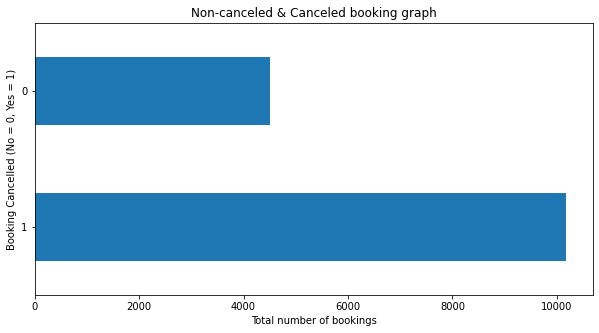

In [ ]:
# plot the graph for total number of bookings vs canceled or non-canceled bookings
plt.rcParams['figure.figsize'] = (10, 5)
is_canceled_counts.plot(kind='barh')
plt.title('Non-canceled & Canceled booking graph')
plt.xlabel('Total number of bookings')
plt.ylabel('Booking Cancelled (No = 0, Yes = 1)')

### **With the help of this bar graph, we can conclude that 75000 of customers checked-in the hotel while 44000 of customers canceled their bookings.** 

In [ ]:
# Finding the percentage of booking
booking_percentage= is_canceled_counts/is_canceled_counts.sum()*100
booking_percentage

1    69.286298
0    30.713702
Name: is_canceled, dtype: float64

Text(0.5, 0, 'Booking Cancelled (No = 0, Yes = 1)')

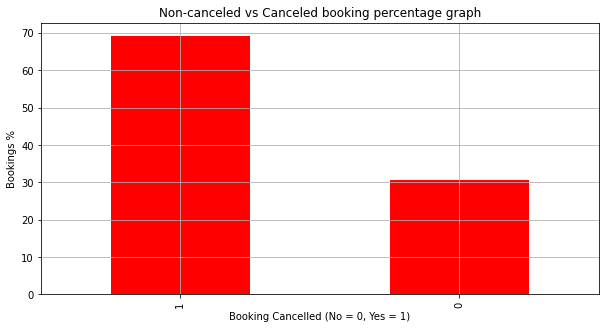

In [ ]:
# Plot the graph for non-canceled vs canceled bookings percentage

booking_percentage.plot(kind='bar',color='red')
plt.grid()
plt.title('Non-canceled vs Canceled booking percentage graph')
plt.ylabel('Bookings %')
plt.xlabel('Booking Cancelled (No = 0, Yes = 1)')

### **From this graph, We got very meaningful insights that 37% of bookings got canceled  Where 63% of customers did checkd-in.**

In [ ]:
# Calculate total number of bookings acorss different years 
year_counts=df['arrival_date_year'].value_counts().sort_index()
year_counts

2015    3928
2016    6488
2017    4268
Name: arrival_date_year, dtype: int64

Text(0.5, 0, 'Years')

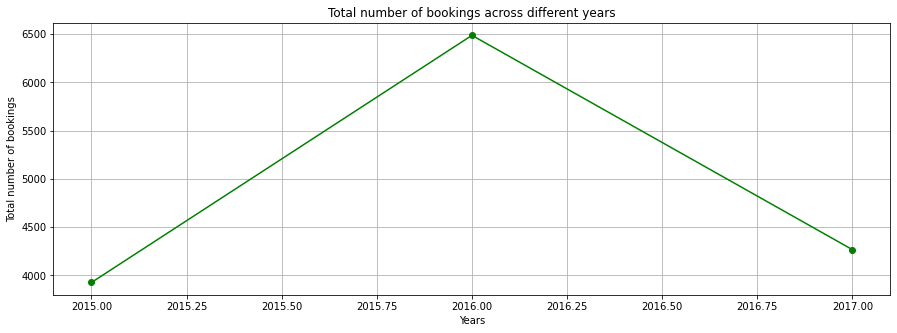

In [ ]:
# Plot the graph for years vs total bookings
plt.rcParams['figure.figsize'] = (15, 5)
year_counts.plot(kind='line',color='green',marker='o')
plt.grid()
plt.title('Total number of bookings across different years')
plt.ylabel('Total number of bookings')
plt.xlabel('Years')

### This plot clearly represents that bookings in year 2016 was highest compared to other years which is near about more than 56500. In year 2017 bookings got fall down compared to last year i.e. 40600 but this value was still quite better than it was in 2015 only about 22000. 

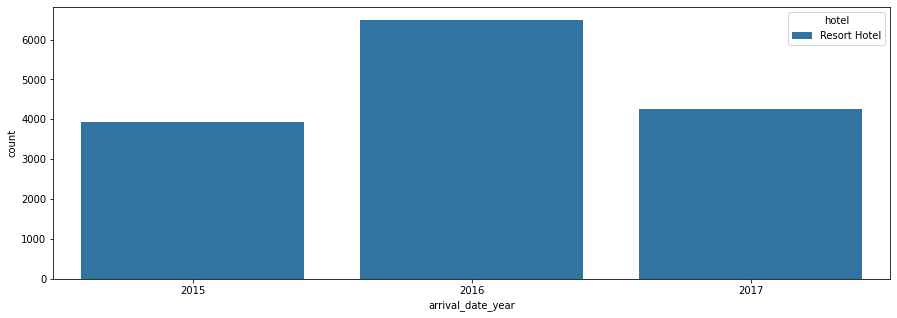

In [ ]:
sns.countplot(x='arrival_date_year', hue='hotel',  data=df)

### Here, We can analyse that city hotels always have high demand as compared to resort hotels. 

In [ ]:
# Fetching top 10 countries of maximum customers
country_counts=df['country'].value_counts().head(10)
country_counts

PRT            8220
GBR            1727
ESP            1331
IRL             614
Not present     438
DEU             414
FRA             332
CHE             143
CN              134
BRA             122
Name: country, dtype: int64

Text(0.5, 0, 'countries')

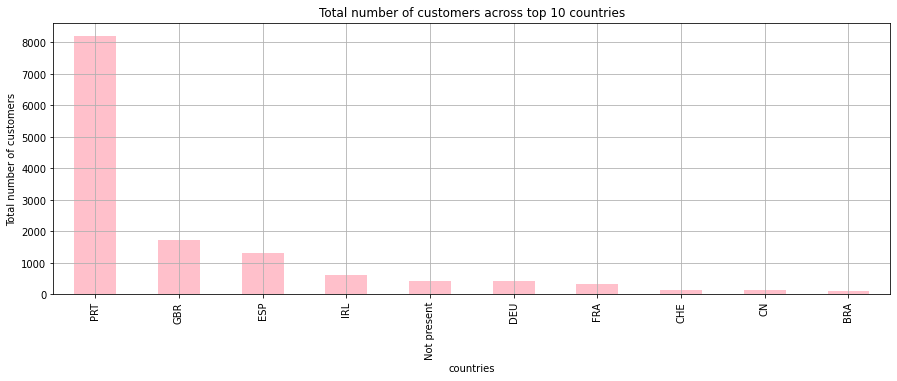

In [ ]:
# plot the graph for maximum number of customers from different countries
country_counts.plot(kind='bar',color='pink')
plt.rcParams['figure.figsize'] = (10,5)
plt.grid()
plt.title('Total number of customers across top 10 countries')
plt.ylabel('Total number of customers')
plt.xlabel('countries')

### **Portugal (prt) has the highest number of customers among these top 10 countries list. UK, France, Spain and Germany are at second, third, fourth and fifth positions accordingly in terms of amount of customers.Since Netherlands (nld) has the lowest number of customers.**

In [ ]:
# Let us find out night stay duration of customers
total_nights_stays = (df['stays_in_weekend_nights']+ df['stays_in_week_nights']).value_counts().head(10).sort_index()
total_nights_stays

1     1856
2     2345
3     2190
4     1967
5     1149
6      748
7     2676
8      344
9      274
10     376
dtype: int64

Text(0.5, 0, 'Number of nights')

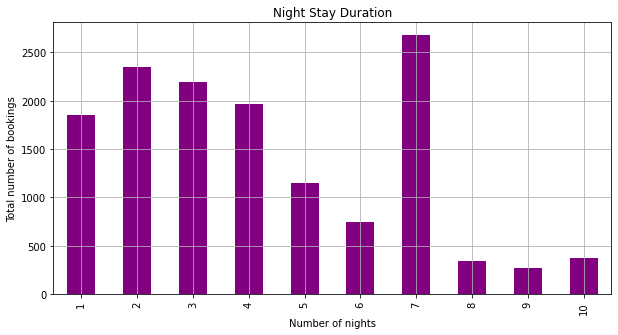

In [ ]:
# Plot the graph of number of nights people wants to stay against total number of bookings
total_nights_stays.plot.bar(color='purple')
plt.rcParams['figure.figsize'] = (10,5)
plt.grid()
plt.title('Night Stay Duration')
plt.ylabel('Total number of bookings')
plt.xlabel('Number of nights')

### Most of the customer prefer to stay one, two, three and four nights.Where number of bookings for two and three nights has high demand.

#      If we try to analyse the optimal length to stay in order to get best daily rate, we can say that two to four days of accomodation can be more affordable since more people prefers the same, the hotels also launches the offers for mid term accomodation beacause long term stay offers will consume their rooms and new customers can not avail the rooms and hotels may fail to generate extra profits. 

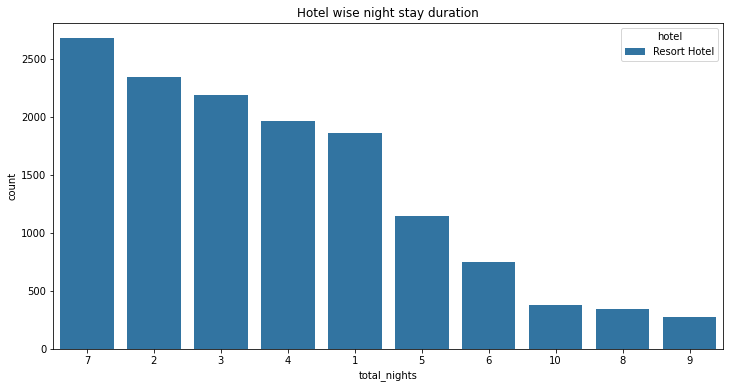

In [ ]:
# Observing peoples interest to stay according to type of hotel with graph
df.loc[:,'total_nights'] = df['stays_in_weekend_nights']+ df['stays_in_week_nights']

fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlabel('No of Nights')
ax.set_ylabel('counts')
ax.set_title('Hotel wise night stay duration')
sns.countplot(x='total_nights', hue='hotel', data=df,
              order = df.total_nights.value_counts().iloc[:10].index)


## According to this visual representation, people interested in city hotel to stay for two, three, one and four days respectively where for resort hotel people interested to stay one, seven, two and three days respectively. 

In [ ]:
# Let us check count of customer throughout all the month
arrival_date_months_count = df.arrival_date_month.value_counts()
arrival_date_months_count

July         2087
August       1996
October      1514
May          1334
April        1332
September    1285
June         1164
March        1008
February      893
December      861
November      784
January       426
Name: arrival_date_month, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


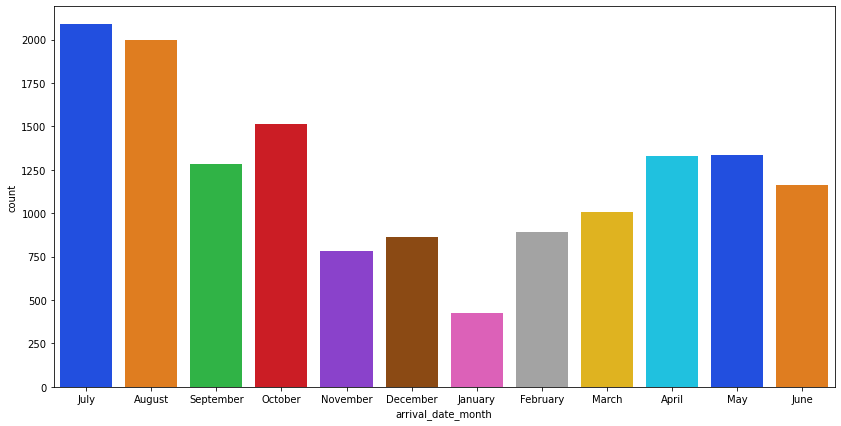

In [ ]:
# plotting the graph to calculate number of customers across all Months
plt.figure(figsize=(14,7))
sns.countplot(df['arrival_date_month'], palette='bright')


### From this presentation of month and count, we can conclude that highest number of customers are in August month followed by July, May, October so on and so forth while January  has the lowest rate of customers. 
#      **Since the month of January has the lowest amount of booking, it can be the best time of year to book a hotel room. Due to less demand of rooms, the cost for room on daily basis also minimum as compared to other months where month of August has high demand for room so it is obvious that the cost of room is also at peak.** 

In [ ]:
# Find out total number of customers across various market segments
market_segment_customers=df.market_segment.value_counts()
market_segment_customers

Online TA        7387
Groups           2906
Offline TA/TO    1940
Direct           1573
Corporate         832
Complementary      45
Name: market_segment, dtype: int64

Text(0.5, 0, 'Market Segment')

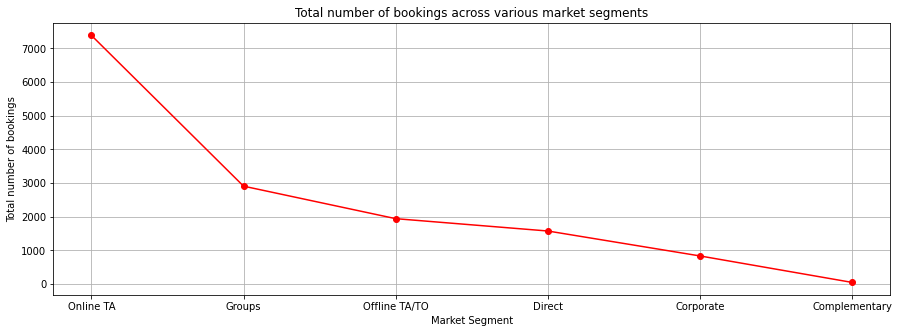

In [ ]:
# plotting market segments with total number of customers
plt.rcParams['figure.figsize'] = (15, 5)
market_segment_customers.plot(kind='line',color='red',marker='o')
plt.grid()
plt.title('Total number of bookings across various market segments')
plt.ylabel('Total number of bookings')
plt.xlabel('Market Segment')

# **Online TA (Travel Agency) segment gives high amount of customers and then Offline TA/TO, Groups,Direct etc. respectively**.
So , from this we concluded that We can target our marketing area to be focus on these travel agencies website and work with them since majority of the visitors tend to reach out to them


In [ ]:
# Analysing interest of customer in meal category
meal_=df.meal.value_counts()
meal_

BB           10577
HB            3211
FB             464
Undefined      404
SC              27
Name: meal, dtype: int64

Text(0.5, 1.0, 'Category of meal in which customer interested more')

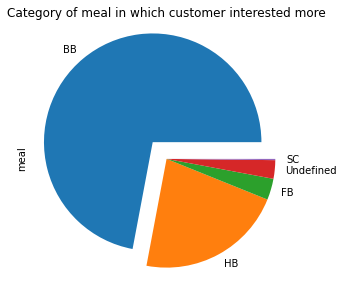

In [ ]:
# Drawing a pie chart to conclude customers interest in meal category
myexplode = [0.2, 0, 0, 0, 0]
meal_.plot(kind='pie',explode = myexplode)
plt.title('Category of meal in which customer interested more')

#    Type of meal booked .

*   Undefined/SC — no meal package
*   BB — Bed & Breakfast
*   HB — Half board (breakfast and one other meal — usually dinner)
*   FB — Full board (breakfast, lunch and dinner)


## **From above pie chart, it is clearly explain that BB type of meal category is the most preferable in all type of customers.**

In [ ]:
# Ensuring the type of customer
customer_type_=df.customer_type.value_counts()
customer_type_

Transient          11630
Transient-Party     2595
Contract             409
Group                 49
Name: customer_type, dtype: int64

Text(0.5, 1.0, 'Customer type')

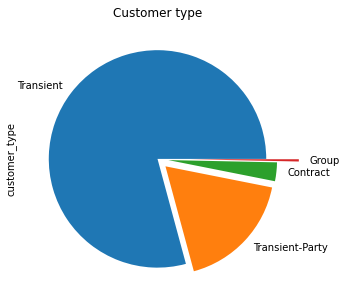

In [ ]:
# Pie chart for type of customer
myexplode = [0, 0.1, 0.1, 0.3]
customer_type_.plot(kind='pie',explode = myexplode)
plt.title('Customer type')

## **Customer Type**